In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import re
import pandas as pd

# Prepare data
trump = pd.read_csv('/content/gdrive/MyDrive/tweets_01-08-2021.csv')

In [ ]:

trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :]
timestamps = trump.date.to_list()
tweets = trump.text.to_list()

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 63.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.0 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(tweets)

Batches:   0%|          | 0/1418 [00:00<?, ?it/s]

2023-11-01 23:40:06,123 - BERTopic - Transformed documents to Embeddings
2023-11-01 23:41:09,186 - BERTopic - Reduced dimensionality
2023-11-01 23:41:14,615 - BERTopic - Clustered reduced embeddings


In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, nr_bins=20)

20it [00:16,  1.22it/s]


In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, global_tuning=True, evolution_tuning=True, nr_bins=20)

20it [00:16,  1.21it/s]


In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, nr_bins=20)

20it [00:16,  1.24it/s]


In [ ]:
datetime_format = "%Y-%m-%d %H:%M:%S"

In [ ]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, datetime_format="%Y-%m-%d %H:%M:%S", nr_bins=20)


20it [00:18,  1.10it/s]


In [ ]:
#topics_over_time = topic_model.topics_over_time(tweets, timestamps, datetime_format="%b%M", nr_bins=20)

ValueError: ignored

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[9, 10, 72, 83, 87, 91])

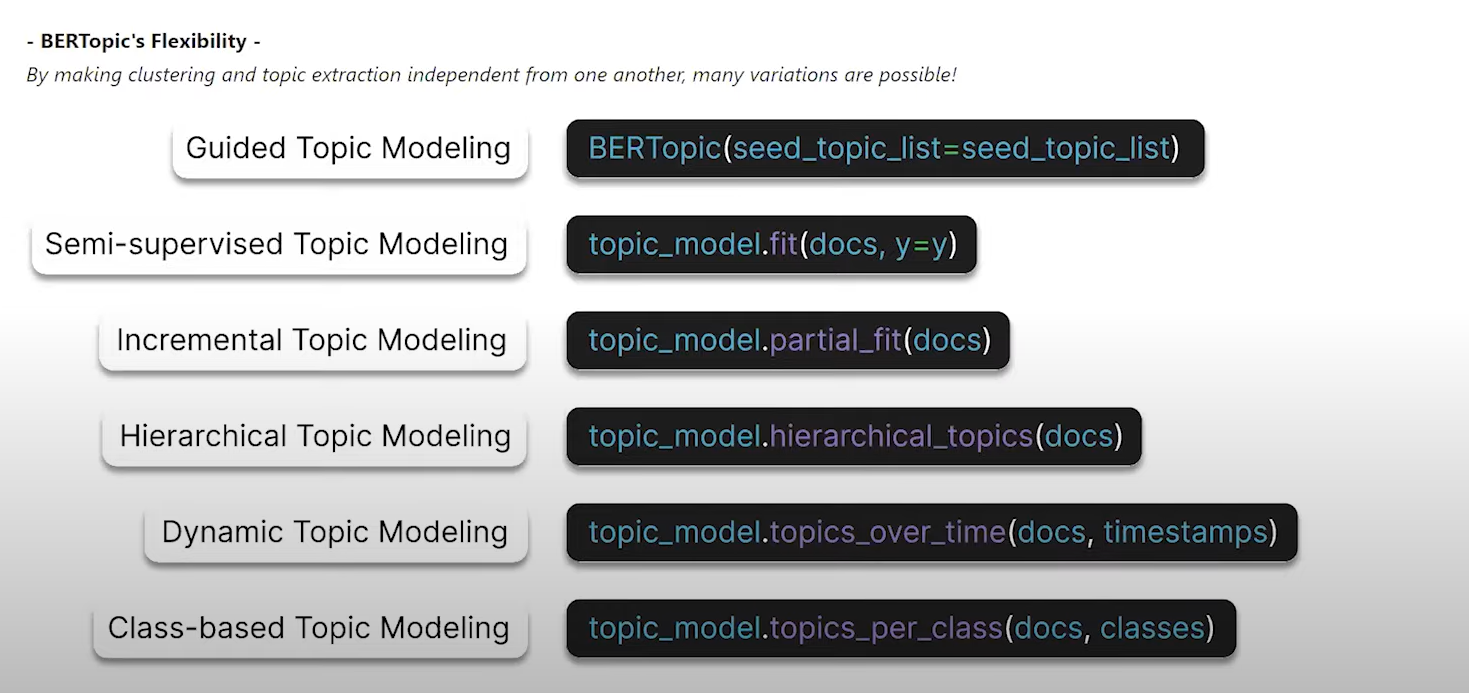

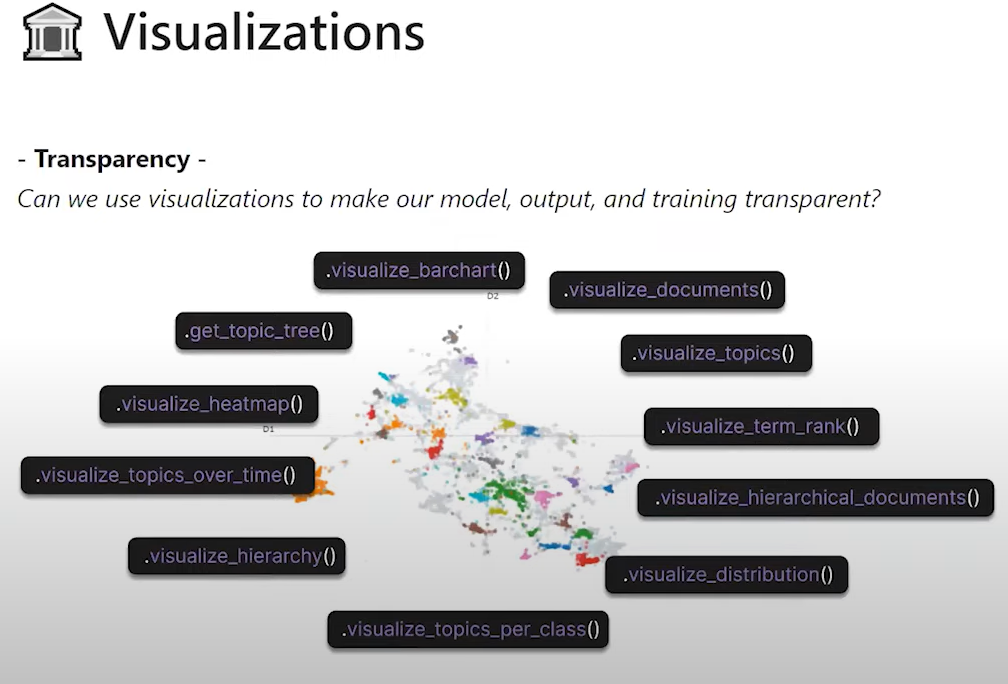